In [182]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from ipywidgets import interact, interact_manual
from bokeh.io import output_notebook
from ipywidgets import Dropdown
from bokeh.models.widgets import Panel, Tabs
output_notebook()

Loading BokehJS ...

In [172]:
base_path = '/Users/erika_ishizuka/Desktop/Github/PYTHON2-FINAL-PROJECT'
em_yr_file = 'excess_yr.csv'
death_rate_file = 'crude_death.csv'

em_yr = pd.read_csv(os.path.join(base_path, em_yr_file), skiprows=8)
crude_death = pd.read_csv(os.path.join(base_path, death_rate_file))

#cleaning
sa_iso = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PER', 'PRY', 'SUR', 
          'URY', 'VEN']

em_yr_cols = ['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'excess.low', 'excess.high']
em_yr = em_yr.loc[em_yr['iso3'].isin(sa_iso)].drop(em_yr_cols, axis=1)
em_yr = em_yr.rename(columns={'pop.e5': 'population', 
                              'excess.mean': 'excess mean'})
em_yr = em_yr[em_yr['year'].str.contains('2020-2021')==False]
em_yr['year']=em_yr['year'].astype(int)
    
crude_cols = ['notes_ids', 'source_id']
crude_death = crude_death.drop(crude_cols, 
                               axis=1).rename(columns={'Years__ESTANDAR': 'year', 'Country__ESTANDAR': 'Country'})


#merging
merge_yr_crude = crude_death.merge(em_yr, how='outer', on=['Country', 'year'])
merge_yr_crude


,indicator,Country,year,value,unit,iso3,population,excess mean
0,Crude death rate,Argentina,2000,7.60,"Rate per 1,000 inhabitants",NaN,NaN,NaN
1,Crude death rate,Argentina,2001,7.55,"Rate per 1,000 inhabitants",NaN,NaN,NaN
2,Crude death rate,Argentina,2002,7.52,"Rate per 1,000 inhabitants",NaN,NaN,NaN
3,Crude death rate,Argentina,2003,7.86,"Rate per 1,000 inhabitants",NaN,NaN,NaN
4,Crude death rate,Argentina,2004,7.48,"Rate per 1,000 inhabitants",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
367,Crude death rate,Venezuela (Bolivarian Republic of),2026,7.48,"Rate per 1,000 inhabitants",NaN,NaN,NaN
368,Crude death rate,Venezuela (Bolivarian Republic of),2027,7.53,"Rate per 1,000 inhabitants",NaN,NaN,NaN
369,Crude death rate,Venezuela (Bolivarian Republic of),2028,7.58,"Rate per 1,000 inhabitants",NaN,NaN,NaN
370,Crude death rate,Venezuela (Bolivarian Republic of),2029,7.63,"Rate per 1,000 inhabitants",NaN,NaN,NaN


In [180]:
#Interactive Plot
data = merge_yr_crude.set_index(['Country', 'year']).sort_index()

def plot_sa_deaths(data, country):
    d = data.loc[country]
    plot_cd = figure(title=country, x_axis_label='Year', y_axis_label='Crude Death Rate', plot_height=300)
    plot_cd.line(d.index, d['value'], color='red', line_width=2)
    panel1 = Panel(child=plot_cd, title='Crude Death')

    plot_em = figure(title=country, x_axis_label='Year', y_axis_label='Excess Mortality', plot_height=300)
    plot_em.line(d.index, d['excess mean'], color='blue', line_width=2)
    panel2 = Panel(child=plot_em, title='Excess Mortality')
    
    countries = ['Argentina', 'Brazil', 'Bolivia (Plurinational State of)', 'Colombia', 
                 'Chile', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
                 'Uruguay', 'Venezuela (Bolivarian Republic of)']
    
    tabs = Tabs(tabs=[panel1, panel2])
    
    return tabs

In [181]:
country_names = data.reset_index()['Country'].unique()
@interact(country=country_names)
def plot_for(country=country_names[0]):
    tabs = plot_sa_deaths(data, country)
    show(tabs)

interactive(children=(Dropdown(description='country', options=('Argentina', 'Bolivia (Plurinational State of)'…

/var/folders/n0/20khn2fn1gb4zwwl5vr0dknm0000gn/T/ipykernel_3532/302799551.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


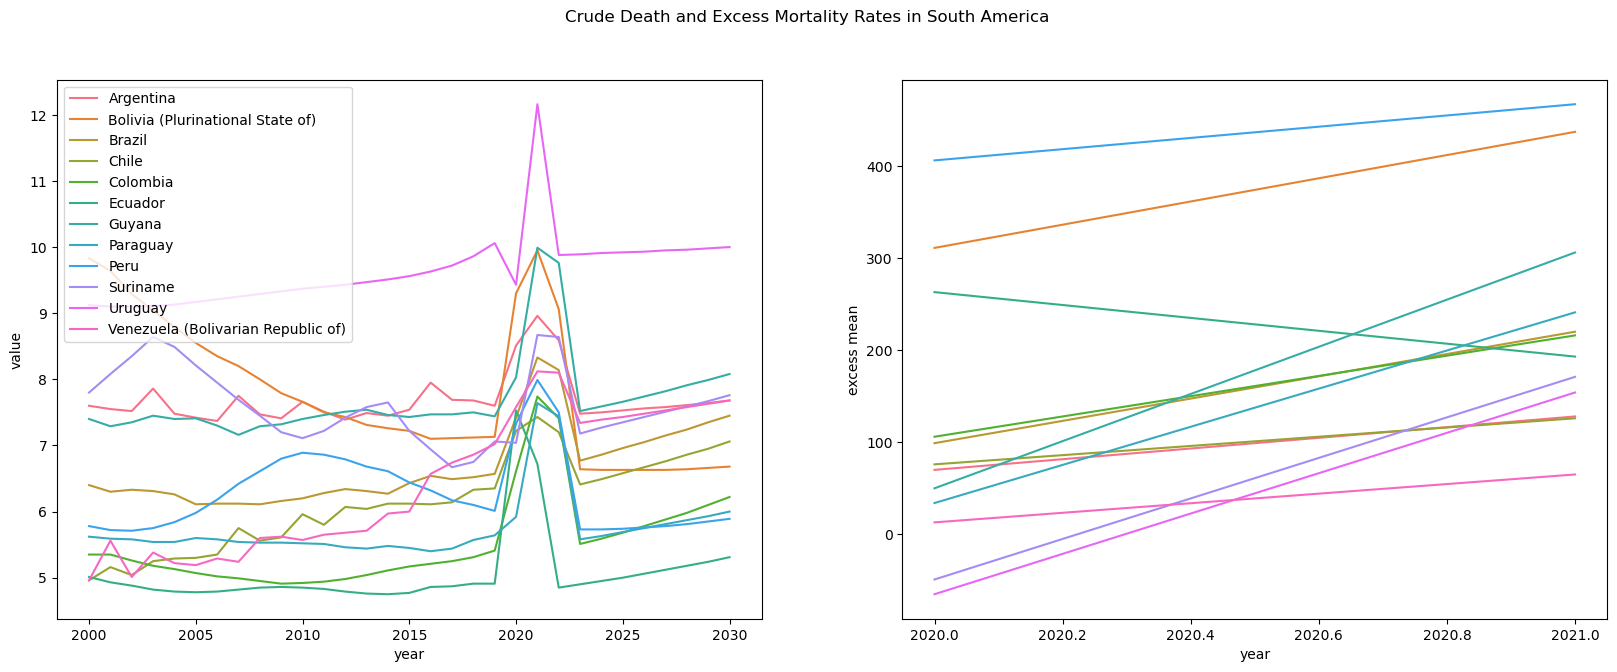

In [204]:
fig1, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.lineplot(ax=axes[0], data=merge_yr_crude, y='value', 
             x='year', hue='Country').legend(loc='upper left')
sns.lineplot(ax=axes[1], data=merge_yr_crude, y='excess mean', 
             x='year', hue='Country', legend=False)
fig1.suptitle('Crude Death and Excess Mortality Rates in South America')
fig1.show()

/var/folders/n0/20khn2fn1gb4zwwl5vr0dknm0000gn/T/ipykernel_3532/3583754066.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


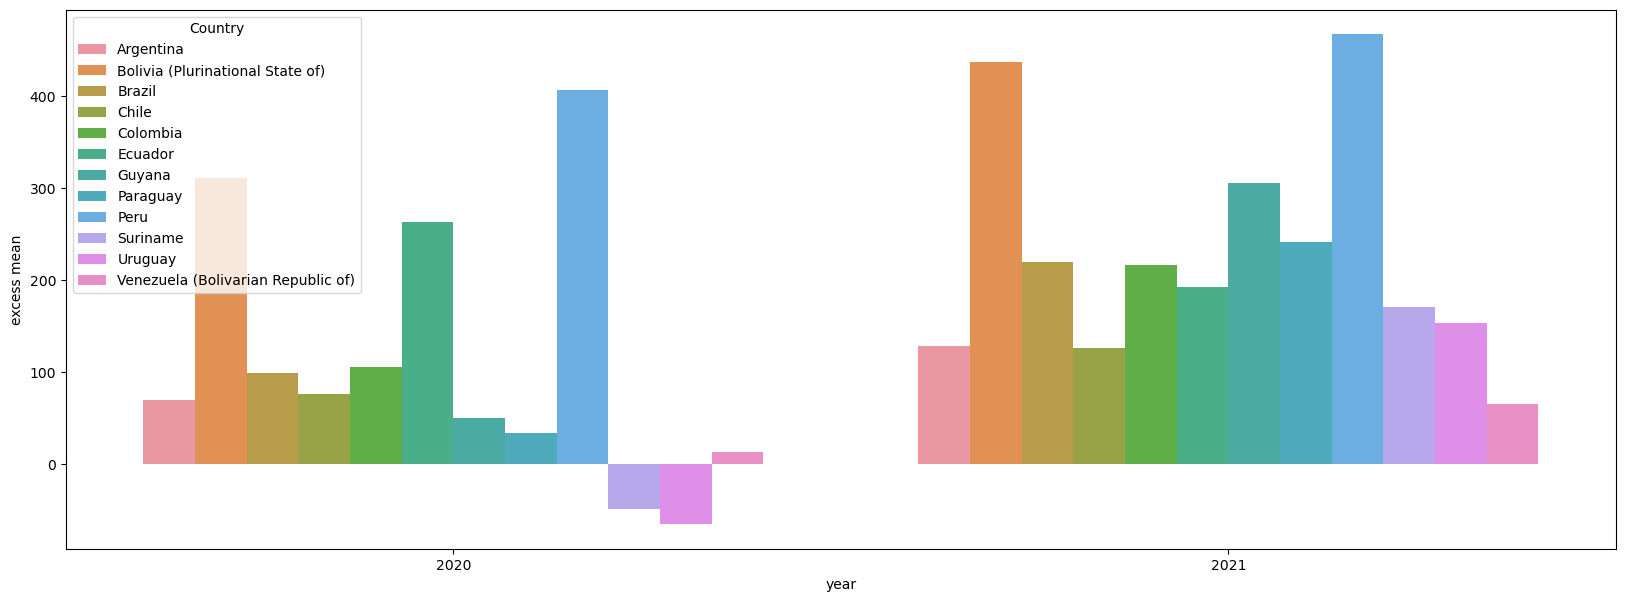

In [205]:
fig2, ax = plt.subplots(figsize=(20, 7))
sns.barplot(ax=ax, data=merge_yr_crude[(merge_yr_crude['year']>=2020) & (merge_yr_crude['year']<=2021)], 
            y='excess mean', x='year', hue='Country')
fig2.show()